### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

yf.pdr_override()
%matplotlib inline

### Getting Price Data

In [2]:
ticker = 'MSFT'
data = pd.DataFrame()
data[ticker] = pdr.get_data_yahoo(ticker, start='1985-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed


### Setting Up Equations

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns_mean = log_returns.mean()
log_returns_variance = log_returns.var()

drift = log_returns_mean - 0.5 * log_returns_variance
log_returns_stdev = log_returns.std()

time_intervals = 1000 # Forecasting 1,000 trading days into the future
iterations = 100 # Forecasting 100 simulations of future stock price

daily_return = np.exp(drift.values + log_returns_stdev.values * norm.ppf(np.random.rand(time_intervals, iterations)))
initial_price = data.iloc[-1]
prices = np.zeros_like(daily_return)
prices[0] = initial_price

### Determining Price

In [4]:
for time in range (1, time_intervals):
    prices[time] = prices[time - 1] * daily_return[time]
prices # Displaying an array of forecasted stock prices

array([[ 338.36999512,  338.36999512,  338.36999512, ...,  338.36999512,
         338.36999512,  338.36999512],
       [ 333.22574905,  337.66828803,  333.4645054 , ...,  342.33341139,
         342.18034483,  326.29338514],
       [ 323.64267995,  338.44736456,  337.47749942, ...,  338.58387861,
         346.20234569,  331.33017666],
       ...,
       [ 531.37611177,  669.15526156,  236.41562793, ..., 1847.22956398,
        1188.90651406,  705.4582937 ],
       [ 523.48149444,  675.37971825,  234.20868804, ..., 1822.39998974,
        1192.72481494,  688.70028158],
       [ 517.94326157,  666.32151264,  234.39338584, ..., 1727.60826427,
        1228.18909126,  690.29779722]])

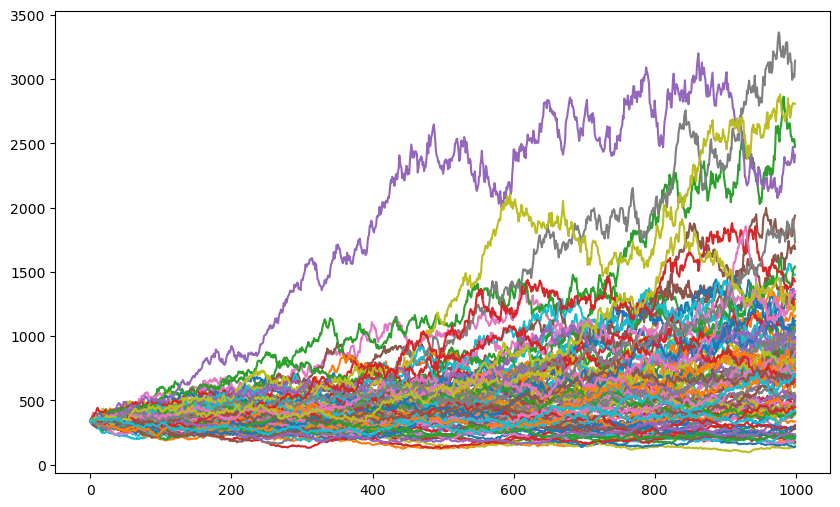

In [5]:
plt.figure(figsize = (10, 6))
plt.plot(prices);
plt.show() # Displaying a graph of forecasted stock prices